# Import Libraries

In [1]:
pip install pyvis

  Using cached pyvis-0.3.2-py3-none-any.whl (756 kB)
  Obtaining dependency information for jsonpickle>=1.4.1 from https://files.pythonhosted.org/packages/d3/25/6e0a450430b7aa194b0f515f64820fc619314faa289458b7dfca4a026114/jsonpickle-3.0.2-py3-none-any.whl.metadata
Using cached jsonpickle-3.0.2-py3-none-any.whl (40 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9389 sha256=8c30103e11d9d7a926579afd90b219f36346eb44f4c014cae905d14ec210f851
  Stored in directory: /Users/Kirudang/Library/Caches/pip/wheels/d0/b0/d7/6dd26c3817810fa379088eaeb755a01d9a2a411c37632079d1
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from pyvis.network import Network
import networkx as nx
import community
import matplotlib.pyplot as plt

#  Import Data

In [2]:
# Read relationship df
relationship_df = pd.read_csv("relationship_df.csv")

# Network Analysis with Community Detection

In [14]:
# 1. Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df,
                            source = "Source",
                            target = "Target",
                            edge_attr = "Weight",
                            create_using = nx.Graph())

# 2. Calculate communities using Louvain
communities = list(nx.algorithms.community.louvain_communities(G))

# Convert communities from sets to lists
communities_dict = {}
for i, community in enumerate(communities):
    for node in community:
        communities_dict[node] = i

# 3. Calculate size of each node using Weight
node_degree = dict(G.degree)

# 4. Set up node attributes
nx.set_node_attributes(G, node_degree, 'size') # Size for each node
nx.set_node_attributes(G, communities_dict, 'group') # Group the nodes to be communitites

# 5. Build Interactive Network using Pyvis
net = Network(notebook=True, width="1000px", height="1000px", bgcolor='#222222', font_color='white')
# Set layout to spring
net.barnes_hut(gravity=-2000, central_gravity=0.3, spring_length=100, spring_strength=0.01)

# 6. Display the Network
net.from_nx(G)
net.show("Dune.html")

Dune.html


# In-depth Network Analysis

## 1. Community Detection (Clustering):
 Community detection, also known as graph clustering, is the process of partitioning a network into distinct groups or communities of nodes based on some similarity measure. Nodes within the same community are more densely connected to each other than to nodes in other communities.

### a. Number of communitites

In [4]:
communities

[{'Alia',
  'Chani',
  'Farok',
  'Gurney',
  'Harah',
  'Jamis',
  'Korba',
  'Otheym',
  'Stilgar'},
 {'Count', 'Feyd-Rautha', 'Piter', 'Shaddam'},
 {'Aramsham', 'Liet-Kynes', 'Paul', 'Vladimir'},
 {'Duncan', 'Lady', 'Leto', 'Thufir', 'Wellington'}]

In [5]:
print(f"Number of communities: {len(communities)}")

Number of communities: 4


### b. People in communities

In [6]:
# Create a dictionary to store the community index and the number of people in each community
community_sizes = {}

# Iterate through the communities and count the number of people in each
for i, community in enumerate(communities):
    community_sizes[f"Community {i + 1}"] = len(community)

# Print the number of people in each community
for community, size in community_sizes.items():
    print(f"{community}: {size} people")

Community 1: 9 people
Community 2: 4 people
Community 3: 4 people
Community 4: 5 people


In [7]:
community_df = pd.DataFrame(list(community_sizes.items()), columns=["Community", "Number of People"])

In [8]:
community_df

,Community,Number of People
0,Community 1,9
1,Community 2,4
2,Community 3,4
3,Community 4,5


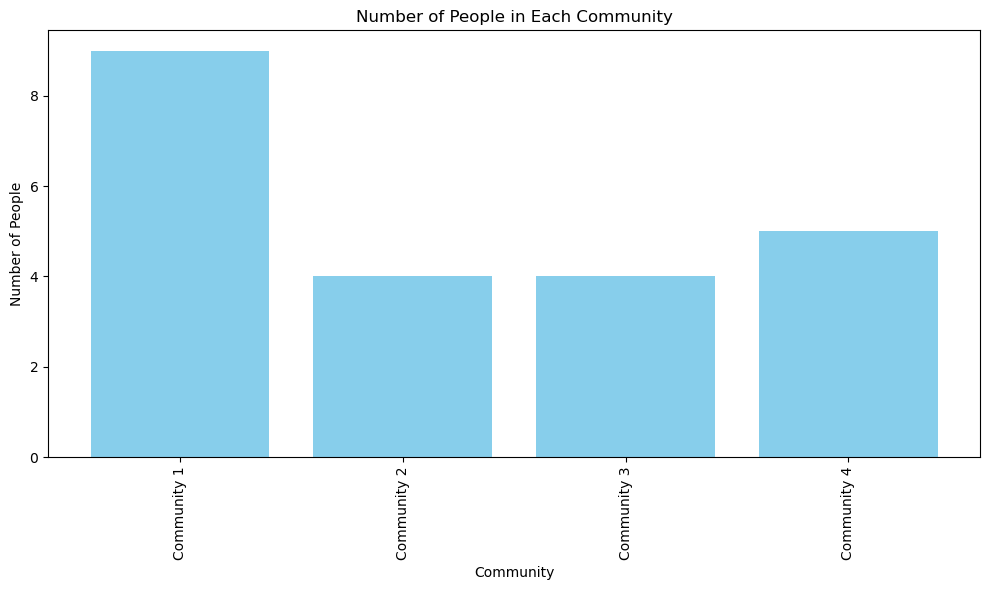

In [9]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.bar(community_df["Community"], community_df["Number of People"], color='skyblue')

# Add labels and title
plt.xlabel("Community")
plt.ylabel("Number of People")
plt.title("Number of People in Each Community")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

## 2. Modularity
Modularity is a measure that quantifies the quality of a community structure within a graph. It compares the number of edges within communities to the expected number of edges in a random graph with the same degree distribution.

In [10]:
# Calculate the modularity of the detected communities
modularity = nx.community.quality.modularity(G, communities)

# Print the modularity score
print(f"Modularity: {modularity}")

Modularity: 0.18224981738495252


**Note**
Modularity is typically a single value that measures the overall quality of the community structure in a graph. It provides an aggregate measure of how well the graph is divided into communities. A single modularity score represents the entire network and indicates how much better the community structure is compared to a random network with the same degree distribution.

If you're interested in evaluating the quality of individual communities, you may want to consider other metrics or techniques specific to community-level analysis. Some alternatives include:

**1. Community Size and Density**: You can calculate and compare the size and density (number of edges within the community) of each individual community. Larger, denser communities may indicate more cohesive groups.

**2. Average Degree**: Compute the average degree (average number of connections) of nodes within each community. Higher average degrees may indicate more tightly connected communities.

**3. Edge Betweenness**: Measure the edge betweenness centrality of the edges within each community. It quantifies how many shortest paths pass through each edge and can help identify "bottleneck" edges within communities.

**4. Community Overlap**: Explore the degree of overlap between communities. Nodes that belong to multiple communities may be hubs connecting different groups.


## 3. Centrality Measures
Centrality measures, such as betweenness centrality and closeness centrality, quantify the importance or influence of a node within a network.

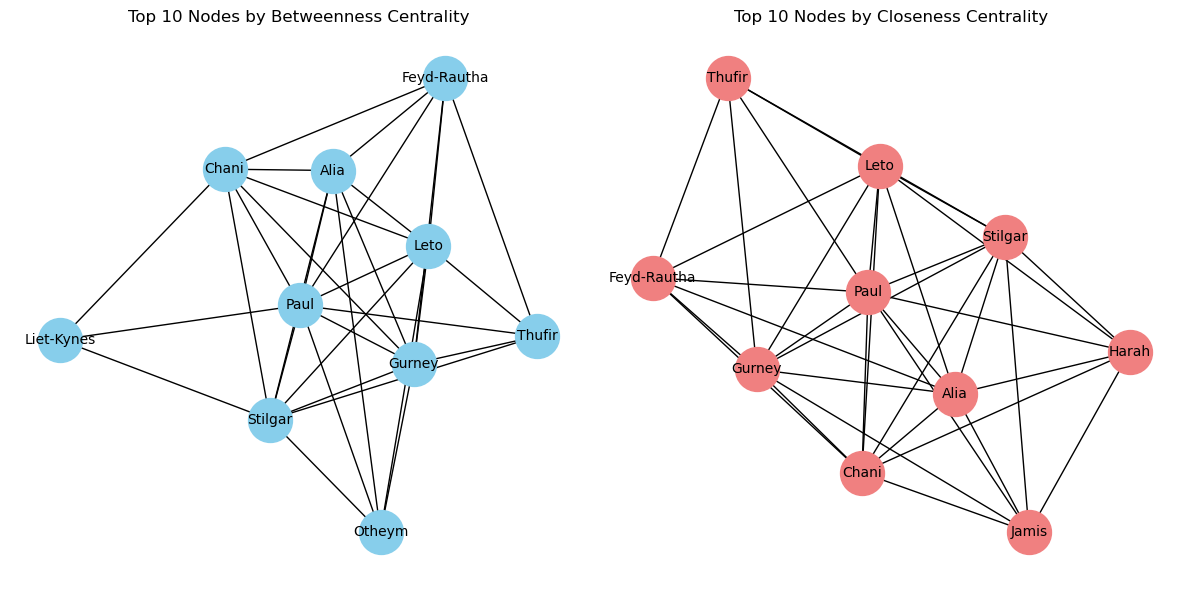

In [11]:
# Calculate centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Sort nodes by centrality measures in descending order and get the top 10 nodes
top_betweenness_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]
top_closeness_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:10]

# Create subplots for the two centrality measures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot top 10 nodes by betweenness centrality
nx.draw(G.subgraph(top_betweenness_nodes), with_labels=True, ax=ax1, node_size=1000, node_color='skyblue', font_color='black', font_size=10)
ax1.set_title('Top 10 Nodes by Betweenness Centrality')

# Plot top 10 nodes by closeness centrality
nx.draw(G.subgraph(top_closeness_nodes), with_labels=True, ax=ax2, node_size=1000, node_color='lightcoral', font_color='black', font_size=10)
ax2.set_title('Top 10 Nodes by Closeness Centrality')

plt.tight_layout()
plt.show()

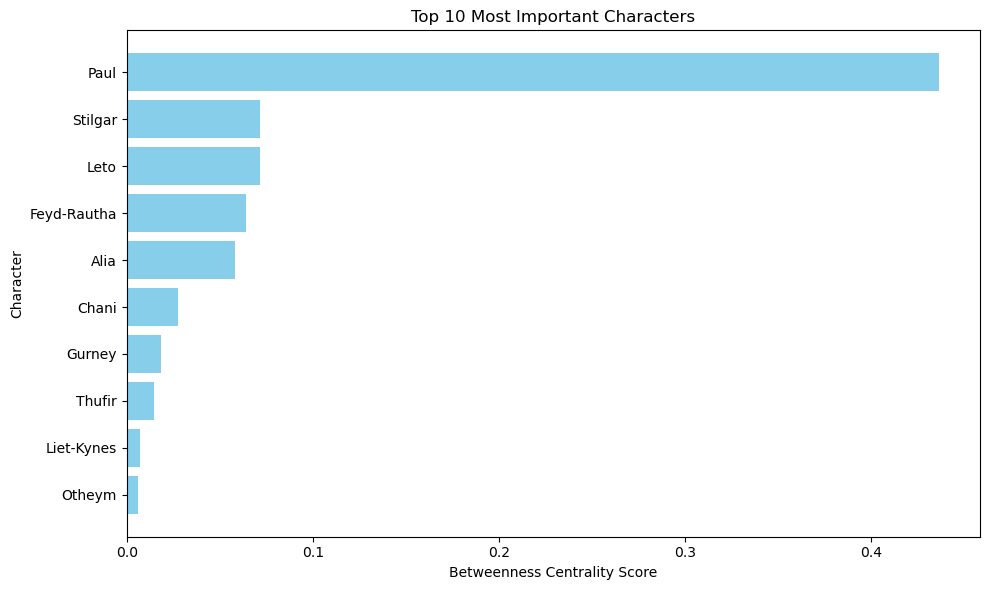

In [12]:
# Calculate betweenness centrality for each node
centrality_scores = nx.betweenness_centrality(G)

# Sort nodes by centrality scores in descending order
sorted_nodes = sorted(centrality_scores.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 nodes with the highest centrality scores
top_10_nodes = sorted_nodes[:10]

# Extract the character names and centrality scores
top_10_names = [node[0] for node in top_10_nodes]
top_10_scores = [node[1] for node in top_10_nodes]

# Create a bar plot for the top 10 most important characters
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.barh(top_10_names, top_10_scores, color='skyblue')  # Horizontal bar plot

# Add labels and title
plt.xlabel("Betweenness Centrality Score")
plt.ylabel("Character")
plt.title("Top 10 Most Important Characters")

# Invert the y-axis to display the highest centrality at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()